In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score
import joblib

In [2]:
data = pd.read_csv("C:/Users/Pc/OneDrive/Pictures/Data science assignments/week 14 - MySQL/5th Nov/KNN Assignment/iphone_purchase_records.csv", sep = ',')
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


## EDA and Data Vizualisation

In [3]:
df = data.copy()
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
df.shape

(400, 4)

In [5]:
# Printing the summary of the DataFrame's structure and content.
print("Summary of the DataFrame's structure and content-------")
df.info()

Summary of the DataFrame's structure and content-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.corr()

C:\Users\Pc\AppData\Local\Temp\ipykernel_11984\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


In [8]:
print("The skewness of the dataset is as follows - ")
print(df.skew())

The skewness of the dataset is as follows - 
Age                0.231337
Salary             0.495024
Purchase Iphone    0.596903
dtype: float64


C:\Users\Pc\AppData\Local\Temp\ipykernel_11984\2002512794.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.skew())


In [9]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

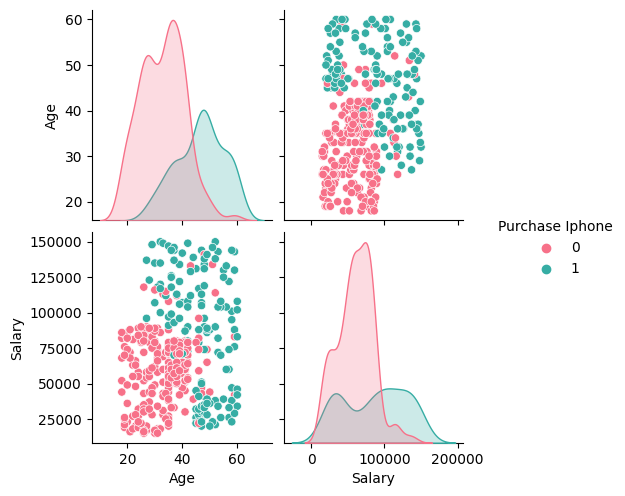

In [10]:
sns.pairplot(data, hue='Purchase Iphone', vars=['Age', 'Salary'], palette='husl')
plt.savefig("pair plot.png")
plt.show()

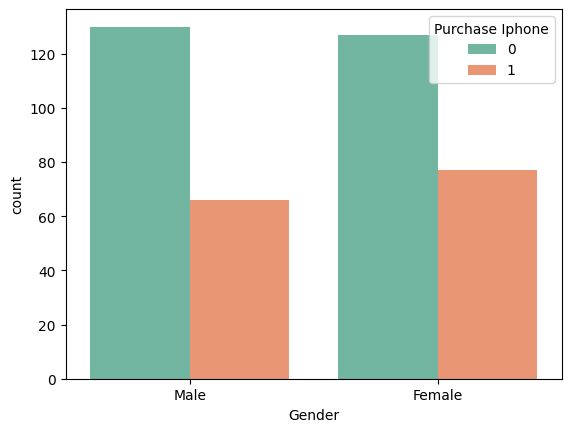

In [11]:
sns.countplot(x='Gender', hue='Purchase Iphone', data=data, palette='Set2')
plt.savefig("gender countplot.png")
plt.show()


## Model Building

## KNeighborsClassifier Model

In [12]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [13]:
X = data[[ 'Age', 'Salary']]
print(X)

     Age  Salary
0     19   19000
1     35   20000
2     26   43000
3     27   57000
4     19   76000
..   ...     ...
395   46   41000
396   51   23000
397   50   20000
398   36   33000
399   49   36000

[400 rows x 2 columns]


In [14]:
y = data['Purchase Iphone']
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


In [15]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [16]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [17]:
from math import sqrt  ##### Standard method to select K
sqrt(data.shape[0])  

20.0

In [18]:
clf = KNeighborsClassifier(n_neighbors=15) ####
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [19]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [20]:
print("The accuracy of the KNeighborsClassifier model is,",round((accuracy_score(y_test,pred)*100),2),"%")

The accuracy of the KNeighborsClassifier model is, 87.5 %


In [39]:
precision = round((precision_score(y_test,pred)*100),2)
print(f'Precision: {precision}',"%")

Precision: 86.96 %


<AxesSubplot: >

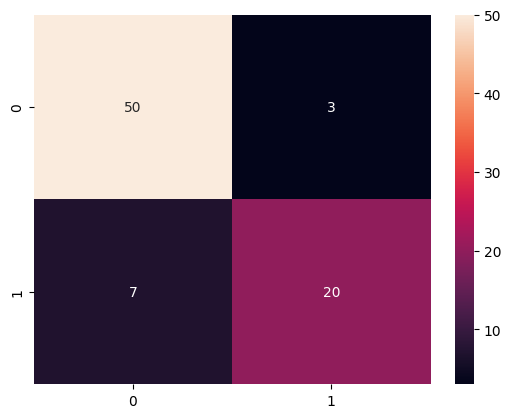

In [21]:
sns.heatmap(confusion_matrix(y_test,pred),annot = True)

In [22]:
##### Error method// Also called as Elbow Method
error = []
for i in range(1,31): ### considering k value from 1 to 30
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - accuracy_score(y_test,predict_i))

In [23]:
error

[0.23750000000000004,
 0.22499999999999998,
 0.17500000000000004,
 0.17500000000000004,
 0.15000000000000002,
 0.15000000000000002,
 0.16249999999999998,
 0.16249999999999998,
 0.15000000000000002,
 0.16249999999999998,
 0.16249999999999998,
 0.13749999999999996,
 0.15000000000000002,
 0.16249999999999998,
 0.125,
 0.16249999999999998,
 0.1875,
 0.17500000000000004,
 0.16249999999999998,
 0.16249999999999998,
 0.15000000000000002,
 0.17500000000000004,
 0.15000000000000002,
 0.16249999999999998,
 0.17500000000000004,
 0.1875,
 0.21250000000000002,
 0.1875,
 0.17500000000000004,
 0.17500000000000004]

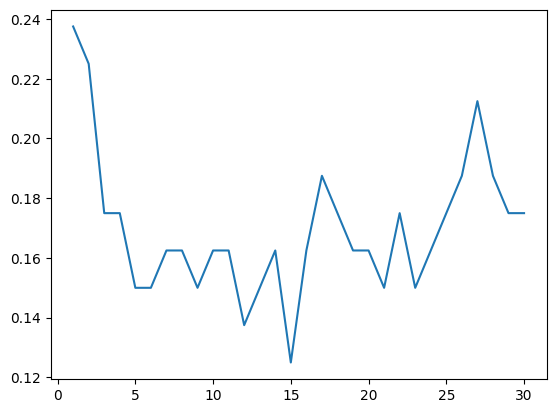

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1,31), error)

## Logistic Regression

In [25]:
lg_model = LogisticRegression()
lg_model_fit = lg_model.fit(X_train,y_train)
pred1 = lg_model_fit.predict(X_test)

In [26]:
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
print("The accuracy of the Logistic Regression model is,",round((accuracy_score(y_test,pred1)*100),2),"%")

The accuracy of the Logistic Regression model is, 66.25 %


## Decision Tree

In [28]:
model_clf = DecisionTreeClassifier(criterion='entropy',max_depth =5)
train_model_clf = model_clf.fit(X_train,y_train)
pred2 = train_model_clf.predict(X_test)

In [29]:
pred2

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [30]:
print("The accuracy of DecisionTreeClassifier Model is,",round((accuracy_score(y_test,pred2)*100),2),"%")

The accuracy of DecisionTreeClassifier Model is, 90.0 %


In [41]:
precision1 = round((precision_score(y_test,pred2)*100),2)
print(f'Precision: {precision1}',"%")

Precision: 80.65 %


## Random Forest

In [31]:
model_rf = RandomForestClassifier(criterion='entropy',max_depth =5)
train_model1 = model_rf.fit(X_train,y_train)
pred3 = train_model1.predict(X_test)

In [32]:
pred3

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [33]:
print("The accuracy of RandomForestClassifier Model is,",round((accuracy_score(y_test,pred3)*100),2),"%")

The accuracy of RandomForestClassifier Model is, 87.5 %


In [42]:
precision2 = round((precision_score(y_test,pred3)*100),2)
print(f'Precision: {precision2}',"%")

Precision: 77.42 %


## Saving the model

In [34]:
filename = 'DecisionTreeClassifier_model.sav'
joblib.dump(train_model_clf,filename)

['DecisionTreeClassifier_model.sav']

In [35]:
## Saving the DecisionTreeClassifier model as it gives tha accuracy of 90%.